## **Importing Libraries**

In [1]:
import numpy as np
import pandas as pd

##**Loading the Dataset**

In [3]:
df=pd.read_csv('MSFT.csv')

##**Displaying the DataFrame**

In [4]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.060274,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062427,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063503,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.061889,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060812,47894400
...,...,...,...,...,...,...,...
9546,2024-01-30,412.260010,413.049988,406.450012,408.589996,408.589996,33477600
9547,2024-01-31,406.959991,415.320007,397.209991,397.579987,397.579987,47871100
9548,2024-02-01,401.829987,408.000000,401.799988,403.779999,403.779999,30657700
9549,2024-02-02,403.809998,412.649994,403.559998,411.220001,411.220001,28245000


##**Checking for Null Values**

In [5]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

##**Checking the DataFrame Information**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       9551 non-null   object 
 1   Open       9551 non-null   float64
 2   High       9551 non-null   float64
 3   Low        9551 non-null   float64
 4   Close      9551 non-null   float64
 5   Adj Close  9551 non-null   float64
 6   Volume     9551 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 522.4+ KB


##**Descriptive Statistics of the DataFrame**

In [7]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9.551000e+03
mean,53.772075,54.342336,53.194282,53.788668,48.296173,5.724680e+07
std,80.668664,81.473826,79.843453,80.700445,80.785674,3.814474e+07
min,0.088542,0.092014,0.088542,0.090278,0.055969,2.304000e+06
25%,5.570313,5.667969,5.460938,5.582031,3.460657,3.278315e+07
50%,27.219999,27.485001,26.990000,27.250000,19.136604,5.036160e+07
75%,45.750000,46.290624,45.144531,45.724375,36.346440,7.118815e+07
max,412.260010,415.320007,406.450012,411.220001,411.220001,1.031789e+09


##**Checking the Shape of the DataFrame**

In [8]:
df.shape

(9551, 7)

##**Filtering the DataFrame Based on Date**

In [9]:
df['Date'] = pd.to_datetime(df['Date'])
mask =( df['Date'] >= '2018-01-01') & (df['Date'] <='2024-01-10')
df = df.loc[mask]

In [10]:
df.shape

(1516, 7)

In [11]:
print("Minimum date value :{}".format(df['Date'].min()))
print("Maximum date value :{}".format(df['Date'].max()))

Minimum date value :2018-01-02 00:00:00
Maximum date value :2024-01-10 00:00:00


##**Visualizing the Stock Value Changes**

In [12]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
colors = ['#FF9900','#000000']

Text(0.5, 1.0, 'Microsoft Stock Value Changes since 2018')

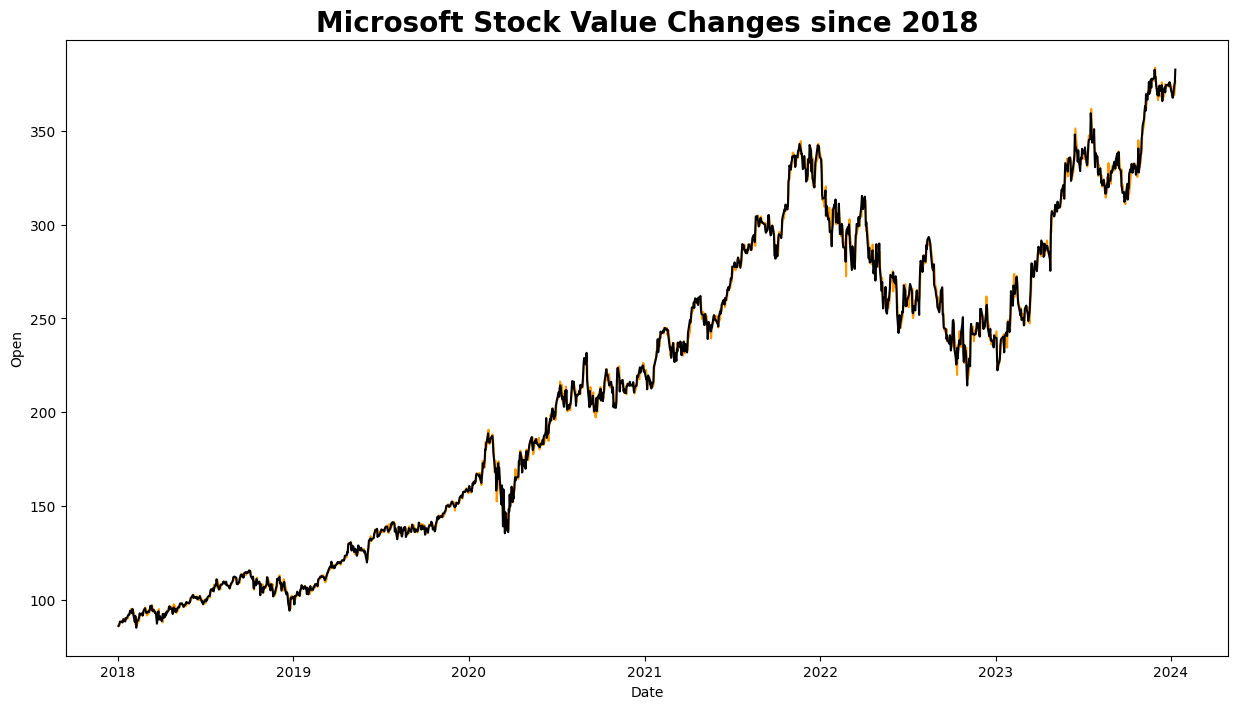

In [13]:
fig = plt.figure(figsize=(15,8))
ax = sns.lineplot(data=df, x = 'Date',y='Open', color= colors[0])
ax = sns.lineplot(data=df, x = 'Date',y='Close', color= colors[1])

plt.title("Microsoft Stock Value Changes since 2018", size = 20, weight = 'bold')

##**Correlation Matrix**

In [14]:
df.corr()['Close']

<ipython-input-14-8695f15c585d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()['Close']


Open         0.999239
High         0.999629
Low          0.999658
Close        1.000000
Adj Close    0.999844
Volume      -0.108807
Name: Close, dtype: float64

<ipython-input-15-f3dd0e08601a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap=[colors[0],colors[1]], linecolor='white', linewidth=2)


<Axes: >

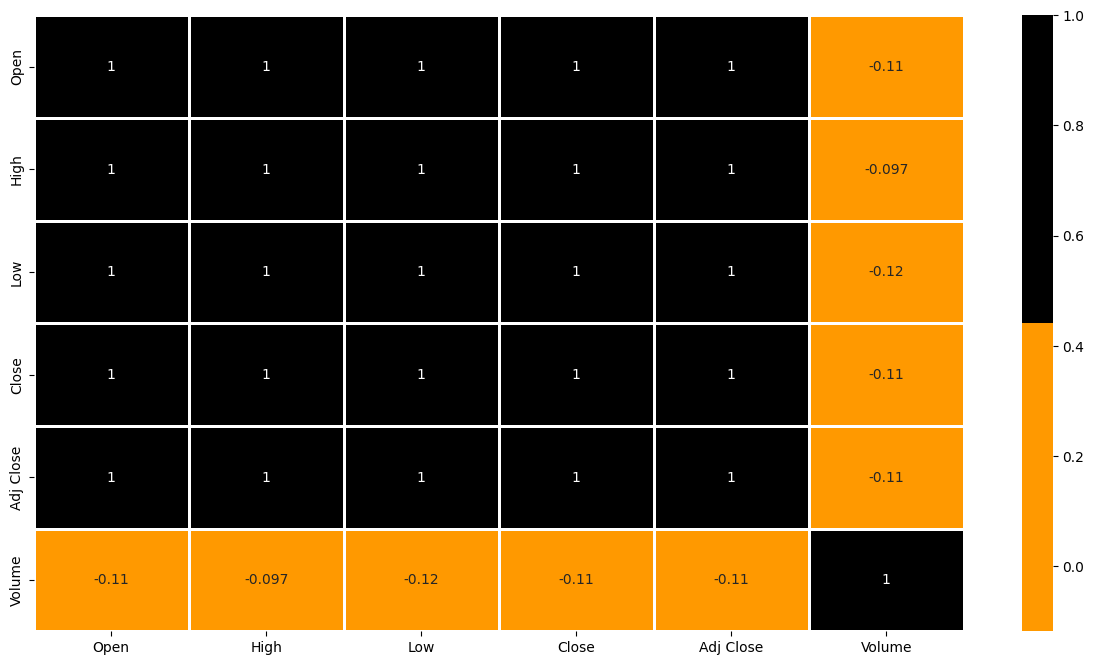

In [15]:
fig = plt.figure(figsize= (15,8))
sns.heatmap(df.corr(), annot=True, cmap=[colors[0],colors[1]], linecolor='white', linewidth=2)

##**Feature Selection**

In [16]:
X=df[['Open','High','Volume','Low']]
Y=df['Close']

***Selecting ‘Open’, ‘High’, ‘Volume’, and ‘Low’ as features (X) and ‘Close’ as the target variable (Y).***

##**Data Splitting**

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, shuffle=False, random_state=42)

***Splitting the data into training and test sets with a test size of 20%.***

##**Data Scaling**

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

***Scaling the features using StandardScaler to standardize the features to have mean=0 and variance=1.***

##**Linear Regression Model Implementation and Evaluation**

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn import set_config

model =  LinearRegression()
model.fit(X_train,Y_train)
set_config(display='digram')
pred=model.predict(X_test)

mse=np.round(mean_squared_error(Y_test,pred),2)
mae=np.round(mean_absolute_error(Y_test,pred),2)

##**Plotting Test and Predicted Values**

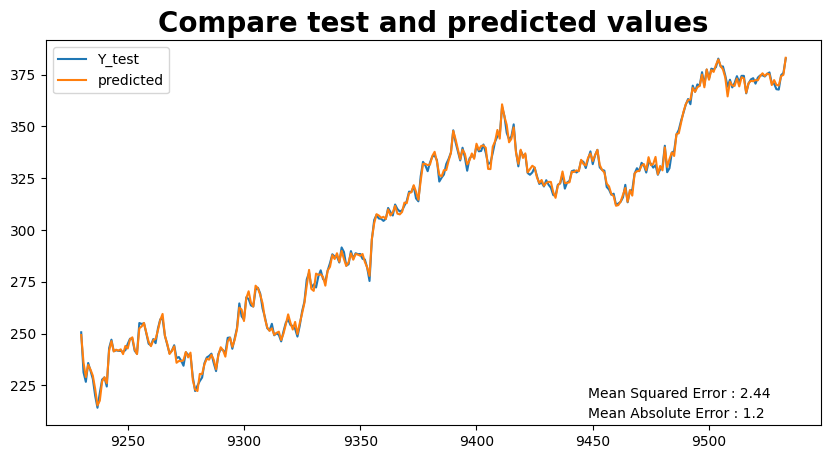

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

# Convert predictions to a pandas Series
p = pd.Series(pred, index=Y_test.index)

# Create the figure and set its size
fig = plt.figure(figsize=(10,5))

# Plot the test data and predictions
plt.plot(Y_test)
plt.plot(p)

# Add a legend
plt.legend(['Y_test', 'predicted'])

# Add a title
plt.title("Compare test and predicted values", size=20, weight='bold')

# Display the error metrics on the plot
plt.text(x=0.7, y=0.07, s='Mean Squared Error : {}'.format(mse), transform=plt.gca().transAxes)
plt.text(x=0.7, y=0.02, s='Mean Absolute Error : {}'.format(mae), transform=plt.gca().transAxes)

# Show the plot
plt.show()

##**Data Preprocessing**

In [21]:
X = df[['Close']]

# Calculate the index for splitting the data
split_index = int(len(X) * 0.8)

# Split the data into training and test sets
training_set = X.iloc[:split_index].values
test_set = X.iloc[split_index:].values

# Import the MinMaxScaler from sklearn
from sklearn.preprocessing import MinMaxScaler

# Create a scaler object
sc = MinMaxScaler(feature_range =(0,1))

# Fit and transform the training set
training_set_scaled = sc.fit_transform(training_set)

# Fit and transform the test set
test_set_scaled = sc.transform(test_set)  # Use transform(), not fit_transform()

# Print the shapes of the scaled datasets
print(training_set_scaled.shape)
print(test_set_scaled.shape)

(1212, 1)
(304, 1)


In [22]:
length = 100
X_train = []
Y_train = []
for i in range(length, len(training_set)):
    X_train.append(training_set_scaled[i-length:i,0])
    Y_train.append(training_set_scaled[i,0])
    print(i-length, "i-1", i-1, "i", i)

0 i-1 99 i 100
1 i-1 100 i 101
2 i-1 101 i 102
3 i-1 102 i 103
4 i-1 103 i 104
5 i-1 104 i 105
6 i-1 105 i 106
7 i-1 106 i 107
8 i-1 107 i 108
9 i-1 108 i 109
10 i-1 109 i 110
11 i-1 110 i 111
12 i-1 111 i 112
13 i-1 112 i 113
14 i-1 113 i 114
15 i-1 114 i 115
16 i-1 115 i 116
17 i-1 116 i 117
18 i-1 117 i 118
19 i-1 118 i 119
20 i-1 119 i 120
21 i-1 120 i 121
22 i-1 121 i 122
23 i-1 122 i 123
24 i-1 123 i 124
25 i-1 124 i 125
26 i-1 125 i 126
27 i-1 126 i 127
28 i-1 127 i 128
29 i-1 128 i 129
30 i-1 129 i 130
31 i-1 130 i 131
32 i-1 131 i 132
33 i-1 132 i 133
34 i-1 133 i 134
35 i-1 134 i 135
36 i-1 135 i 136
37 i-1 136 i 137
38 i-1 137 i 138
39 i-1 138 i 139
40 i-1 139 i 140
41 i-1 140 i 141
42 i-1 141 i 142
43 i-1 142 i 143
44 i-1 143 i 144
45 i-1 144 i 145
46 i-1 145 i 146
47 i-1 146 i 147
48 i-1 147 i 148
49 i-1 148 i 149
50 i-1 149 i 150
51 i-1 150 i 151
52 i-1 151 i 152
53 i-1 152 i 153
54 i-1 153 i 154
55 i-1 154 i 155
56 i-1 155 i 156
57 i-1 156 i 157
58 i-1 157 i 158
59 i-1 1

##**Reshaping the Data**

In [23]:
X_train, Y_train = np.array(X_train), np.array(Y_train)
X_train = np.reshape(X_train,(X_train.shape[0], X_train.shape[1],1))

X_test = []
Y_test = []
for i in range(length, len(test_set)):
    X_test.append(test_set_scaled[i-length:i,0])
    Y_test.append(test_set_scaled[i,0])

X_test, Y_test = np.array(X_test), np.array(Y_test)
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1],1))


##**Building and Training the LSTM Model**

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [25]:
model = Sequential()
model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 50))
model.add(Dropout(0.2))

model.add(Dense(units = 1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')

model.fit(X_train, Y_train, validation_data =(X_test, Y_test), epochs = 100, batch_size = 32 )

Epoch 1/100
35/35 [==============================] - 21s 353ms/step - loss: 0.0410 - val_loss: 0.0142
Epoch 2/100
35/35 [==============================] - 12s 338ms/step - loss: 0.0064 - val_loss: 0.0223
Epoch 3/100
35/35 [==============================] - 10s 280ms/step - loss: 0.0055 - val_loss: 0.0153
Epoch 4/100
35/35 [==============================] - 10s 278ms/step - loss: 0.0050 - val_loss: 0.0157
Epoch 5/100
35/35 [==============================] - 9s 252ms/step - loss: 0.0045 - val_loss: 0.0057
Epoch 6/100
35/35 [==============================] - 8s 239ms/step - loss: 0.0045 - val_loss: 0.0031
Epoch 7/100
35/35 [==============================] - 12s 335ms/step - loss: 0.0038 - val_loss: 0.0078
Epoch 8/100
35/35 [==============================] - 7s 208ms/step - loss: 0.0040 - val_loss: 0.0024
Epoch 9/100
35/35 [==============================] - 8s 228ms/step - loss: 0.0040 - val_loss: 0.0076
Epoch 10/100
35/35 [==============================] - 7s 212ms/step - loss: 0.0037 - v

##**Model Evaluation**

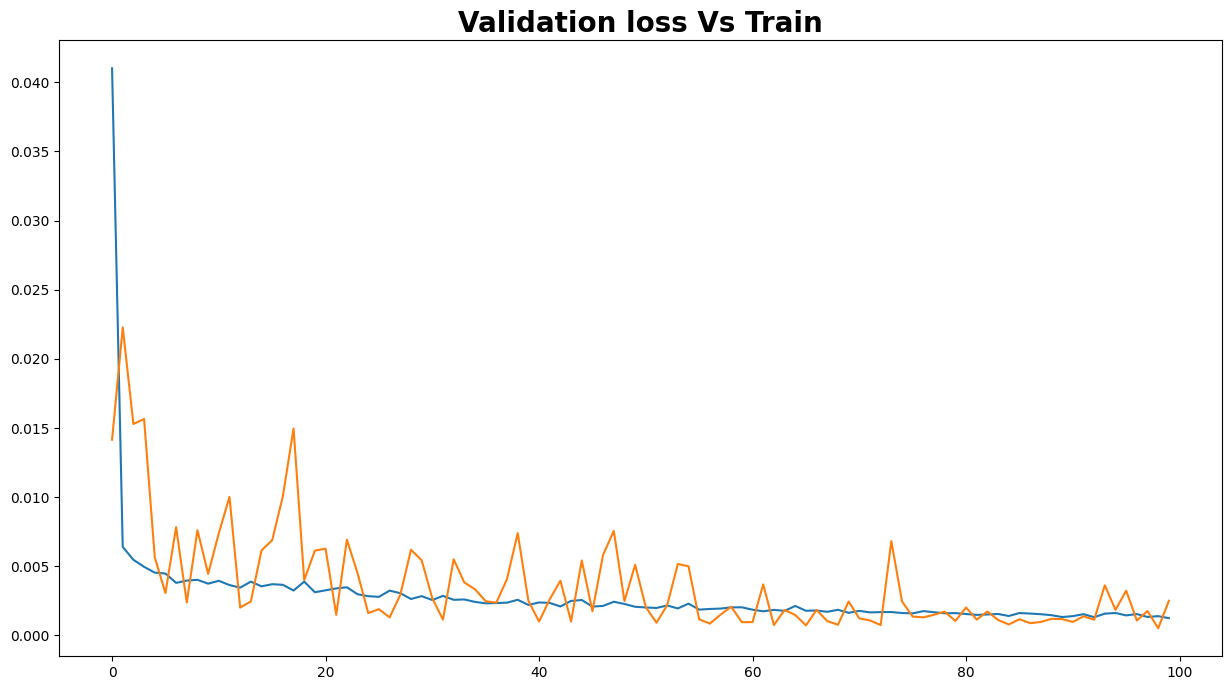

In [26]:
loss = pd.DataFrame(model.history.history)

fig = plt.figure(figsize = (15,8))

plt.title("Validation loss Vs Train", size = 20, weight = 'bold')
plt.plot(loss)

In [27]:
pred = model.predict(X_test)
test = pd.DataFrame(columns = ['test','pred'])
test['test'] = Y_test
test['pred'] = pred.flatten()
test

7/7 [==============================] - 2s 46ms/step


,test,pred
0,0.731383,0.714717
1,0.725610,0.723749
2,0.746416,0.723973
3,0.757691,0.722065
4,0.741457,0.722745
...,...,...
199,1.096203,1.053330
200,1.095467,1.046145
201,1.122356,1.040067
202,1.126618,1.042437


In [28]:
r2 = np.round(r2_score(Y_test, pred), 2)
mse=np.round(mean_squared_error(Y_test,pred),2)
mae=np.round(mean_absolute_error(Y_test,pred),2)

print('R2 Score :', r2)
print('Mean Squared Error :', mse)
print('Mean Absolute Error :', mae)

R2 Score : 0.78
Mean Squared Error : 0.0
Mean Absolute Error : 0.04


##**Visualizing Test and Predicted Values**

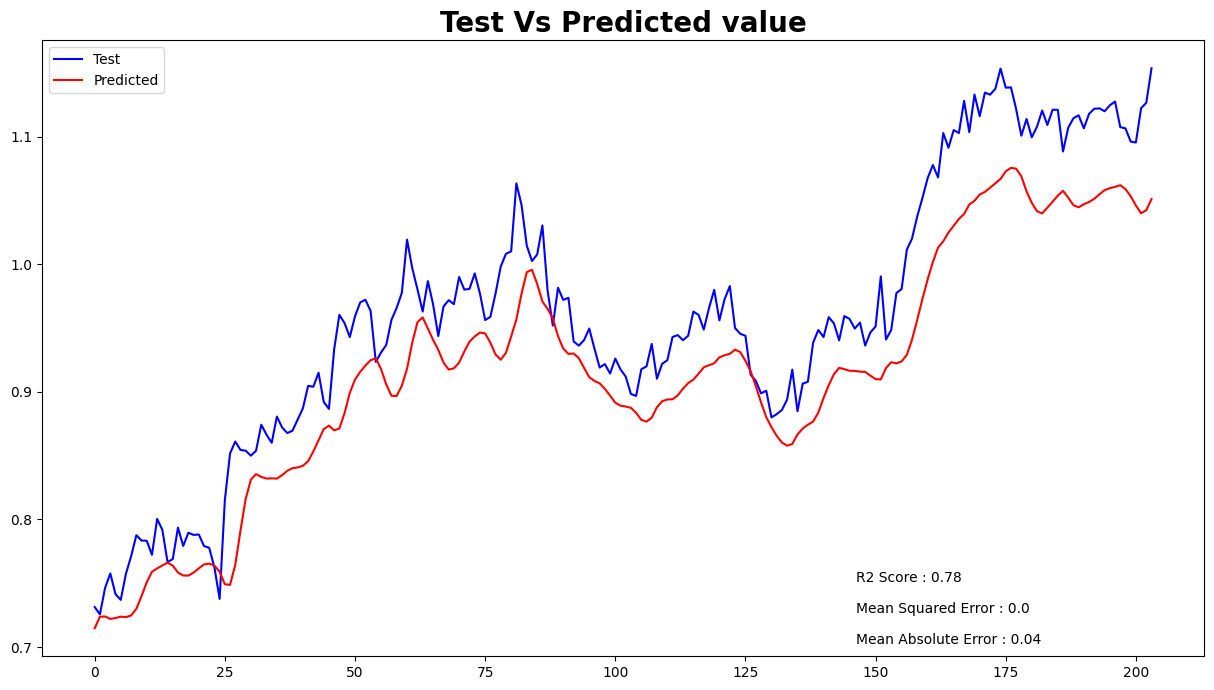

In [29]:
fig = plt.figure(figsize = (15,8))
plt.title("Test Vs Predicted value", size = 20, weight = 'bold')
plt.plot(Y_test, color = 'blue')  # Plotting the test values
plt.plot(pred, color = 'red')  # Plotting the predicted values
plt.legend(['Test','Predicted'])

plt.text(x=0.7, y=0.12, s='R2 Score : {}'.format(r2), transform=plt.gca().transAxes)
plt.text(x=0.7, y=0.07, s='Mean Squared Error : {}'.format(mse), transform=plt.gca().transAxes)
plt.text(x=0.7, y=0.02, s='Mean Absolute Error : {}'.format(mae), transform=plt.gca().transAxes)

plt.show()